# Repte 1: ANPR


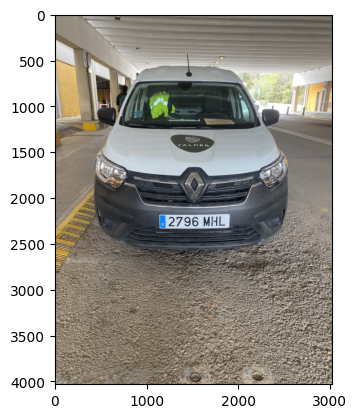

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

imagePath = "images\propies\cotxe1.jpg"

image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# transform from RGB2HSV

plt.imshow(image)

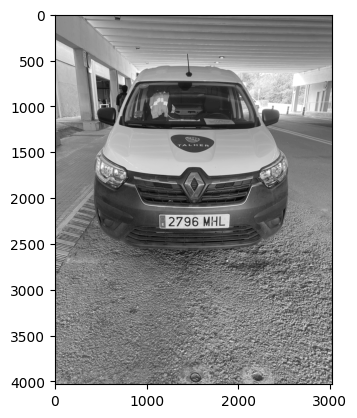

In [46]:
# gray scale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')

### Morfologia matemàtica


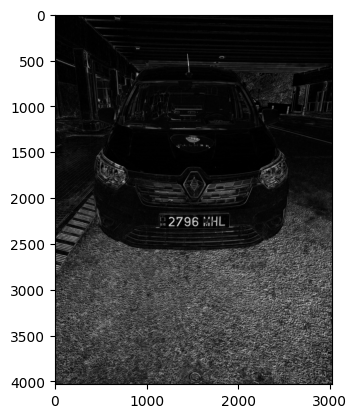

In [58]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, rectKern)
plt.imshow(blackhat, cmap='gray')

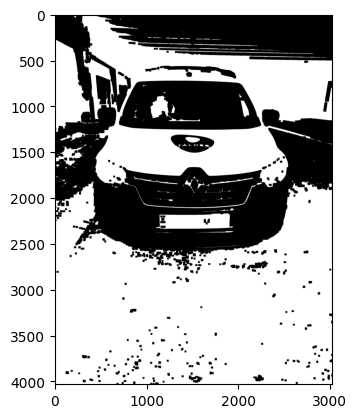

In [62]:
# next, find regions in the image that are light
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
light = cv2.morphologyEx(image, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(light, cmap='gray')

### Edge Detection

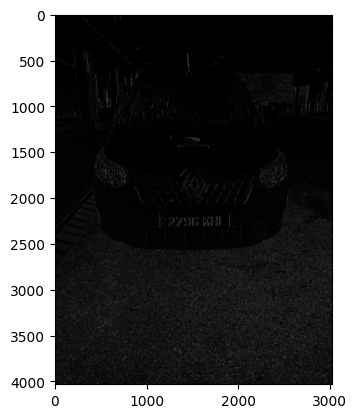

In [51]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
plt.imshow(gradX, cmap='gray')

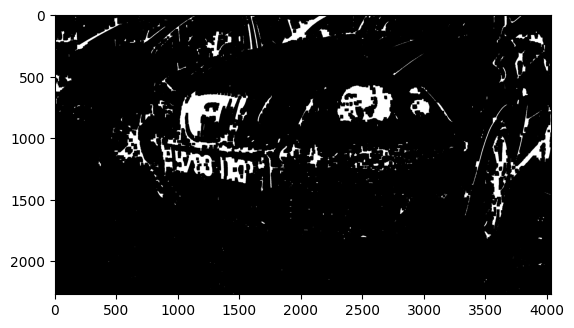

In [44]:
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap='gray')

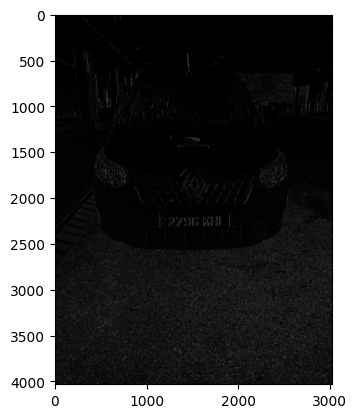

In [64]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
    dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
plt.imshow(gradX, cmap='gray')